# Machine Learning Modeling
## Predicting Food Delivery Time

In [55]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import matplotlib.pyplot as plt

In [40]:
df = pd.read_csv("../data/processed/food_delivery_clean.csv")

df.head()

,Distance_km,Weather,Traffic_Level,Time_of_Day,Vehicle_Type,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min
0,7.93,Windy,Low,Afternoon,Scooter,12,1.0,43
1,16.42,Clear,Medium,Evening,Bike,20,2.0,84
2,9.52,Foggy,Low,Night,Scooter,28,1.0,59
3,7.44,Rainy,Medium,Afternoon,Scooter,5,1.0,37
4,19.03,Clear,Low,Morning,Bike,16,5.0,68


## Pemisahan Fitur dan Target

In [41]:
X = df.drop(columns=["Delivery_Time_min"])
y = df["Delivery_Time_min"]

X.head(), y.head()

(   Distance_km Weather Traffic_Level Time_of_Day Vehicle_Type  \
 0         7.93   Windy           Low   Afternoon      Scooter   
 1        16.42   Clear        Medium     Evening         Bike   
 2         9.52   Foggy           Low       Night      Scooter   
 3         7.44   Rainy        Medium   Afternoon      Scooter   
 4        19.03   Clear           Low     Morning         Bike   
 
    Preparation_Time_min  Courier_Experience_yrs  
 0                    12                     1.0  
 1                    20                     2.0  
 2                    28                     1.0  
 3                     5                     1.0  
 4                    16                     5.0  ,
 0    43
 1    84
 2    59
 3    37
 4    68
 Name: Delivery_Time_min, dtype: int64)

## Encoding Data Kategorikal

In [42]:
categorical_cols = X.select_dtypes(include="object").columns
numeric_cols = X.select_dtypes(include=["int64", "float64"]).columns

categorical_cols, numeric_cols

(Index(['Weather', 'Traffic_Level', 'Time_of_Day', 'Vehicle_Type'], dtype='object'),
 Index(['Distance_km', 'Preparation_Time_min', 'Courier_Experience_yrs'], dtype='object'))

In [43]:
preprocessor = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_cols),
        ("num", "passthrough", numeric_cols)
    ]
)

## Train-Test Split

In [44]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

X_train.shape, X_test.shape

((800, 7), (200, 7))

## Model 1: Linear Regression (Baseline)

In [45]:
lr_model = Pipeline(
    steps=[
        ("preprocessor", preprocessor),
        ("model", LinearRegression())
    ]
)

lr_model.fit(X_train, y_train)

,steps,"[('preprocessor', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('cat', ...), ('num', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [46]:
y_pred_lr = lr_model.predict(X_test)

mae_lr = mean_absolute_error(y_test, y_pred_lr)
mse_lr = mean_squared_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mse_lr)
r2_lr = r2_score(y_test, y_pred_lr)

mae_lr, rmse_lr, r2_lr

(5.899168698353484, np.float64(8.82647014987338), 0.8261894538886112)

## Model 2: Decision Tree Regressor

In [47]:
dt_model = Pipeline(
    steps=[
        ("preprocessor", preprocessor),
        ("model", DecisionTreeRegressor(random_state=42))
    ]
)

dt_model.fit(X_train, y_train)

,steps,"[('preprocessor', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('cat', ...), ('num', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [48]:
y_pred_dt = dt_model.predict(X_test)

mae_dt = mean_absolute_error(y_test, y_pred_dt)
mse_dt = mean_squared_error(y_test, y_pred_dt)
rmse_dt = np.sqrt(mse_dt)
r2_dt = r2_score(y_test, y_pred_dt)

mae_dt, rmse_dt, r2_dt

(10.87, np.float64(16.1533278305122), 0.4178618990969921)

In [49]:
pd.DataFrame({
    "Model": ["Linear Regression", "Decision Tree"],
    "MAE": [mae_lr, mae_dt],
    "RMSE": [rmse_lr, rmse_dt],
    "R2": [r2_lr, r2_dt]
})

,Model,MAE,RMSE,R2
0,Linear Regression,5.899169,8.826470,0.826189
1,Decision Tree,10.870000,16.153328,0.417862


Decision Tree dengan parameter default menunjukkan performa yang lebih buruk dibanding Linear Regression.
Hal ini mengindikasikan bahwa model cenderung overfitting dan kurang mampu melakukan generalisasi
pada data yang belum pernah dilihat.

## Model 3: Random Forest Regressor


In [50]:
rf_model = Pipeline(
    steps=[
        ("preprocessor", preprocessor),
        ("model", RandomForestRegressor(
            n_estimators=100,
            random_state=42,
            n_jobs=-1
        ))
    ]
)

rf_model.fit(X_train, y_train)

,steps,"[('preprocessor', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('cat', ...), ('num', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [51]:
y_pred_rf = rf_model.predict(X_test)

mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, y_pred_rf)

mae_rf, rmse_rf, r2_rf

(6.87395, np.float64(9.751601176217166), 0.78784470635664)

In [52]:
pd.DataFrame({
    "Model": ["Linear Regression", "Decision Tree", "Random Forest"],
    "MAE": [mae_lr, mae_dt, mae_rf],
    "RMSE": [rmse_lr, rmse_dt, rmse_rf],
    "R2": [r2_lr, r2_dt, r2_rf]
})

,Model,MAE,RMSE,R2
0,Linear Regression,5.899169,8.826470,0.826189
1,Decision Tree,10.870000,16.153328,0.417862
2,Random Forest,6.873950,9.751601,0.787845


Berdasarkan perbandingan performa ketiga model, Linear Regression dipilih sebagai model final.
Meskipun Random Forest mampu menangkap hubungan non-linear, performanya tidak melampaui
Linear Regression. Hal ini mengindikasikan bahwa hubungan antara fitur dan target variabel
cenderung linear, sehingga model sederhana memberikan generalisasi yang lebih baik.

## Contoh data baru untuk prediksi

In [59]:
sample_data = pd.DataFrame({
    "Weather": ["Clear"],
    "Traffic_Level": ["High"],
    "Time_of_Day": ["Evening"],
    "Vehicle_Type": ["Motorcycle"],
    "Distance_km": [5.0],
    "Preparation_Time_min": [15],
    "Courier_Experience_yrs": [2]
})

predicted_time = lr_model.predict(sample_data)
predicted_time

array([46.42283914])

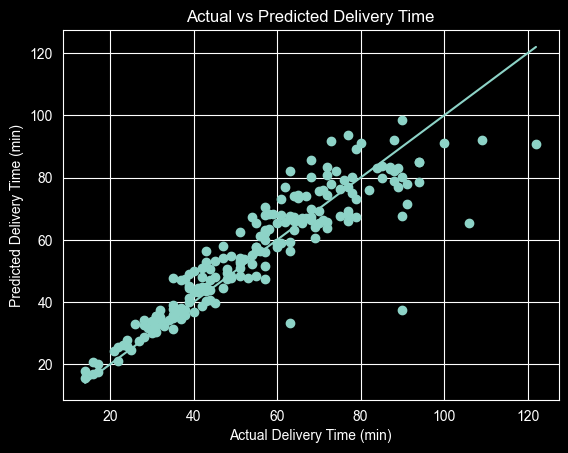

In [56]:
plt.figure()
plt.scatter(y_test, y_pred_lr)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()])
plt.xlabel("Actual Delivery Time (min)")
plt.ylabel("Predicted Delivery Time (min)")
plt.title("Actual vs Predicted Delivery Time")
plt.show()